# Sentiment analysis with BOW representation

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

## Today lab

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Today-lab" data-toc-modified-id="Today-lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Today lab</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#About-Train,-validation-and-test-sets" data-toc-modified-id="About-Train,-validation-and-test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7" rel="nofollow" target="_blank">About Train, validation and test sets</a></a></span></li><li><span><a href="#Undestand-the-dataset" data-toc-modified-id="Undestand-the-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Undestand the dataset</a></span></li></ul></li><li><span><a href="#Build-X-(features-vectors)-and-y-(labels)" data-toc-modified-id="Build-X-(features-vectors)-and-y-(labels)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build X (features vectors) and y (labels)</a></span></li><li><span><a href="#Our-previous-baseline" data-toc-modified-id="Our-previous-baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Our previous baseline</a></span></li><li><span><a href="#Build-an-MLP-Classifier" data-toc-modified-id="Build-an-MLP-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build an MLP Classifier</a></span></li></ul></div>

## Load dataset

In [108]:
import pandas as pd
import numpy as np
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [109]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")
print(TRAIN.columns)
TRAIN.head()

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


## Build X (features vectors) and y (labels)

In [110]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

In [111]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

In [152]:
y_test

0      4
1      4
2      1
3      1
4      5
      ..
995    5
996    4
997    5
998    5
999    1
Name: Rating, Length: 1000, dtype: int64

## Features extraction

A bag-of-words model is a way of extracting features from text so the text input can be used with machine learning algorithms or neural networks.

Each document, in this case a review, is converted into a vector representation. The number of items in the vector representing a document corresponds to the number of words in the vocabulary. The larger the vocabulary, the longer the vector representation, hence the preference for smaller vocabularies in the previous section.

Words in a document are scored and the scores are placed in the corresponding location in the representation.

In order to extract feature, you can use `CountVectorizer` or `TfidfVectorizer` and you can perform the desired text cleaning.

$$[TODO - Students]$$ 
> * Quickly remind what are `CountVectorizer`, `TfidfVectorizer` and how they work.
> * Build the BOW representation for train and test set

###1. CountVectorizer:
Convert a collection of text documents to a matrix of token counts.

In [112]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = X_train

#Convert the train set
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()

X_train_cvec = pd.DataFrame(data=count_array, columns = coun_vect.get_feature_names())
print(X_train_cvec.shape)

(5000, 8991)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###2. TfidfVectorizer:
Convert a collection of raw documents to a matrix of TF-IDF features.

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)

print(X_train_tvec.shape)

(5000, 8991)


## Build a baseline with logistic regression.

Using the previous BOW representation, fit a logistic regression model and evaluate it.

$$[TODO - Students]$$ 
> * Quickly remind what are `LogisticRegression` and how they work.
> * What are the possible metrics. Choose one and justify your choice.

##1. LOGISTIC REGRESSION for CountVectorizer:

In [114]:
# Build your model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_cvec, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [115]:
#Convert X_test with CountVectorizer:
count_matrix_test = coun_vect.transform(X_test)
count_array_test = count_matrix_test.toarray()
X_test_cvec = pd.DataFrame(data=count_array_test,columns = coun_vect.get_feature_names())
#print(df_test)


print("Training score = ",logreg.score(X_train_cvec, y_train))
print("Testing score = ",logreg.score(X_test_cvec, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Training score =  0.9068
Testing score =  0.666


##2. LOGISTIC REGRESSION for TfidfVectorizer:

In [116]:
# Build your model
from sklearn.linear_model import LogisticRegression

logreg_tf = LogisticRegression()
logreg_tf.fit(X_train_tvec, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [117]:
#Convert X_test with CountVectorizer:
X_test_tvec = tvec.transform(X_test)

print("Training score = ",logreg_tf.score(X_train_tvec, y_train))
print("Testing score = ",logreg_tf.score(X_test_tvec, y_test))

Training score =  0.7772
Testing score =  0.673


## Build an MLP Classifier


In [118]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

$$[TODO - Students]$$ 
> * Quickly remind what are `Multi Layer Perceptron` and how they work.
> * If necessary, One hot encode the output vectors

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons

In [119]:
X_train.shape, y_train.shape, X_train_cvec.shape

((5000,), (5000,), (5000, 8991))

In [120]:
# Encode output vector if necessary.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(y_train.values.reshape(-1,1))

#Transform y_train
Y_train = encoder.fit_transform(y_train.values.reshape(-1,1)).toarray()

#Transform y_test
Y_test =  encoder.fit_transform(y_test.values.reshape(-1,1)).toarray()

In [121]:
Y_train.shape, Y_test.shape

((5000, 5), (1000, 5))

$$[TODO - Students]$$ 
> * What is the size of the input vector and the output vector?

In [122]:
# Define constant
input_dim = X_train_cvec.shape[1]
output_dim = Y_train.shape[1]

In [123]:
input_dim, output_dim 

(8991, 5)

$$[TODO - Students]$$ 

> * Build a simple network to predict the star rating of a review using the functional API. It should have the following characteristic : one hidden layer with 256 nodes and relu activation.
> * What is the activation function of the output layer?

In [124]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Dense(256, input_dim=X_train_cvec.shape[1], activation='relu'))
model.add(layers.Dense(Y_train.shape[1], activation='sigmoid'))

In [125]:
#What is the activation function of the output layer?
#
#It is sigmoid

$$[TODO - Students]$$ 

We are now compiling and training the model.
> * Using the tensorflow documentation, explain the purpose the EarlyStopping callback and detail its arguments.
> * Compile the model
> * Fit the model

EarlyStopping callback: 
- Stop training when a monitored metric has stopped improving.

Parameters:

1. monitor: Quantity to be monitored.

2. min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

3. patience: Number of epochs with no improvement after which training will be stopped.

4. verbose	verbosity mode.
5. mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

6. baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

7. restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

In [128]:
import numpy as np
from keras.callbacks import EarlyStopping

# Compile the model and start training
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

#Convert them to numpy
X_train_cvec = np.asarray(X_train_cvec)
Y_train = np.asarray(Y_train)
X_test_cvec = np.asarray(X_test_cvec)
Y_test = np.asarray(Y_test)

# Stop training with early stopping with patience of 20
#Define EarlyStopping with patience =20
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

history = model.fit(X_train_cvec, Y_train,
                    epochs=100,
                    verbose=False,
                    callbacks=[es],
                    validation_split=0.20,
                    batch_size=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2301952   
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 2,303,237
Trainable params: 2,303,237
Non-trainable params: 0
_________________________________________________________________
Epoch 00022: early stopping


$$[TODO - Students]$$ 

> * Babysit your model: plot learning curves

In [ ]:
# Plot the learning curves and analyze them
# It's possible to plot them very easily using: pd.DataFrame(history.history).plot(figsize=(8,5))

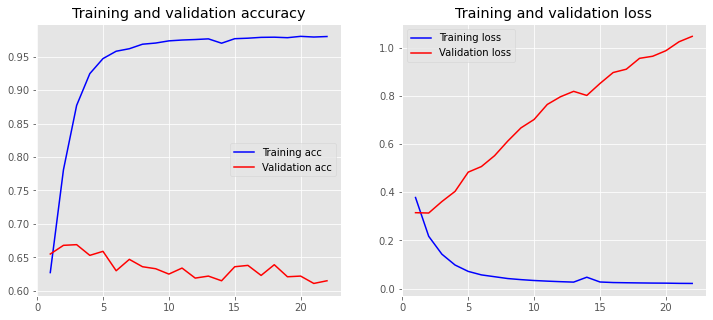

In [130]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

$$[TODO - Students]$$ 

> * How do you interpret those learning curves ?

The model appears to overfit the training data. Various strategies could reduce the overfitting but for this lab we will just change the number and size of layers. We will do that a little later.

> * Evaluate the model (on test part) and plot confusion matrix.
> * Are you doing better or worse than with our first attempt with Logistic regression.

In [129]:
# Evaluate the model
loss, accuracy = model.evaluate(X_train_cvec, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_cvec, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9092
Testing Accuracy:  0.6300


In [158]:
# Print/plot the confusion matrix
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix


rounded_labels=np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, y_test)
cm


array([[  0, 108,  22,  10,  17,  16],
       [  0,  10,   5,   2,   4,   6],
       [  0,   9,   4,  13,  13,   6],
       [  0,  13,   6,  21,  45,  69],
       [  0,  19,  14,  25,  84, 459],
       [  0,   0,   0,   0,   0,   0]])

In [132]:
#Are you doing better or worse than with our first attempt with Logistic regression?
#
#Worse than the logistic regression because logistic regression's accuracy is 0.66. 
#MLP accuracy is 0.63

## Hyper-parameters search

Using [KerasTuner] (https://www.tensorflow.org/tutorials/keras/keras_tuner) and modifying various hyper-parameters, improve your model. Change in particular the number of layers, the number of neurons per layer, the dropout, the regularization.

In [162]:
#!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.2 MB/s 


In [192]:
import tensorflow as tf
from tensorflow import keras

def model_builder(hp):
  model = keras.Sequential()

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  #model.add(layers.Dense(256, input_dim=X_train_cvec.shape[1], activation='relu'))
  #model.add(layers.Dense(100, 256, activation='relu'))
  model.add(layers.Dense(Y_train.shape[1], activation='sigmoid'))


  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [193]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project ./intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from ./intro_to_kt/tuner0.json


In [194]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [195]:
tuner.search(X_train_cvec, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.01.



In [196]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_cvec, Y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

125/125 [==============================] - 2s 18ms/step - loss: 0.0182 - accuracy: 0.9822 - val_loss: 0.9870 - val_accuracy: 0.6490
Epoch 41/50
125/125 [==============================] - 2s 18ms/step - loss: 0.0177 - accuracy: 0.9837 - val_loss: 0.9821 - val_accuracy: 0.6400
Epoch 42/50
125/125 [==============================] - 2s 19ms/step - loss: 0.0181 - accuracy: 0.9815 - val_loss: 1.0033 - val_accuracy: 0.6450
Epoch 43/50
125/125 [==============================] - 2s 18ms/step - loss: 0.0179 - accuracy: 0.9833 - val_loss: 1.0051 - val_accuracy: 0.6410
Epoch 44/50
125/125 [==============================] - 2s 18ms/step - loss: 0.0181 - accuracy: 0.9818 - val_loss: 1.0053 - val_accuracy: 0.6450
Epoch 45/50
125/125 [==============================] - 2s 19ms/step - loss: 0.0180 - accuracy: 0.9820 - val_loss: 1.0252 - val_accuracy: 0.6440
Epoch 46/50
125/125 [==============================] - 2s 19ms/step - loss: 0.0177 - accuracy: 0.9830 - val_loss: 1.0206 - val_accuracy: 0.6310
Epoc

In [197]:
#Re-instantiate the hypermodel and train it with the optimal number of epochs from above.


hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train_cvec, Y_train, epochs=best_epoch, validation_split=0.2)

125/125 [==============================] - 3s 20ms/step - loss: 0.3468 - accuracy: 0.6420 - val_loss: 0.3084 - val_accuracy: 0.6780


In [198]:
eval_result = hypermodel.evaluate(X_test_cvec, Y_test)
print("[test loss, test accuracy]:", eval_result)

32/32 [==============================] - 0s 8ms/step - loss: 0.3065 - accuracy: 0.6770
[test loss, test accuracy]: [0.30649635195732117, 0.6769999861717224]


The accuracy increased from 0.63 to 0.67